# First we add the libraries we will use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import datetime as dt
import plotly.express as px

# We define and filter data

In [3]:
df = pd.read_csv("/Users/emreserhatakkas/Downloads/project_data.csv")

In [2]:
df3 = pd.concat(map(pd.read_csv, glob.glob('/Users/emreserhatakkas/Downloads/emresakkas_churndata/*.csv')))

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (36,58,59,64,65,66,67,69,70,73,75,76,77,80,81,84,86,87,89,90,95,97,99,100,102,103,105,106,107,108) have mixed types.Specify dtype option on import or set low_memory=False.
  op = _Concatenator(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (64,65,66,67,69,70,73,75,76,77,80,81,84,86,87,89,90,95,97,99,100,102,103,105,106,107,108) have mixed types.Specify dtype option on import or set low_memory=False.
  op = _Concatenator(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (39,64,65,66,67,69,70,73,75,76,77,80,81,84,86,87,89,90,95,97,99,100,102,103,105,106,107,108) have mixed types.Specify dtype option on import or set low_memory=False.
  op = _Concatenator(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (12,64,65,66,67,69,70,73,75,76,77

In [6]:
main_data = df3.filter(items = ['industry','churn_type'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97419 entries, 0 to 97418
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            97419 non-null  int64 
 1   created_at         97419 non-null  object
 2   account_type       97419 non-null  object
 3   status             97419 non-null  object
 4   first_upgrade      97419 non-null  object
 5   last_upgrade       97419 non-null  object
 6   cancel_date        97419 non-null  object
 7   activeness         45320 non-null  object
 8   total_paid_months  97419 non-null  int64 
 9   ever_paid          97419 non-null  int64 
 10  total_amount_paid  97419 non-null  int64 
 11  plan               29007 non-null  object
 12  churn_type         29007 non-null  object
 13  churn_date         29007 non-null  object
 14  currency           97419 non-null  object
dtypes: int64(4), object(11)
memory usage: 11.1+ MB


In [5]:
df.head()

,user_id,created_at,account_type,status,first_upgrade,last_upgrade,cancel_date,activeness,total_paid_months,ever_paid,total_amount_paid,plan,churn_type,churn_date,currency
0,4514312841,2020-04-14 08:54:10 UTC,PLATINUM,ACTIVE,2020-04-14 09:06:03 UTC,2021-04-25 17:29:17 UTC,2020-04-25 14:03:35 UTC,NaN,24,1,10079,NaN,NaN,NaN,USD
1,4545592751,2020-08-12 15:48:38 UTC,GOLD,ACTIVE,2015-09-24 19:19:48 UTC,2021-08-12 06:36:09 UTC,1970-01-01 00:00:00 UTC,very active,20,1,3726,SILVER,LONG-TERM,2020-04-26 16:32:56 UTC,USD
2,4560543341,2020-10-05 05:35:58 UTC,GOLD,ACTIVE,2020-10-05 05:38:37 UTC,2021-10-25 06:19:16 UTC,2021-10-25 06:10:02 UTC,NaN,18,1,3113,NaN,NaN,NaN,USD
3,4500768231,2020-01-30 10:23:54 UTC,GOLD,ACTIVE,2020-01-30 10:25:17 UTC,2022-04-11 09:40:43 UTC,2022-04-08 22:57:42 UTC,very active,27,1,3050,NaN,NaN,NaN,USD
4,4534521641,2020-07-01 13:44:06 UTC,FREE,ACTIVE,2016-05-06 11:06:07 UTC,2019-09-06 12:07:11 UTC,1970-01-01 00:00:00 UTC,NaN,41,1,3023,NaN,NaN,NaN,USD


# We convert date indicating variables from object to datetime

In [7]:
df[["created_at","first_upgrade","last_upgrade","cancel_date","churn_date"]] = df[["created_at","first_upgrade","last_upgrade","cancel_date","churn_date"]].apply(pd.to_datetime)

# We define paid-customers terms (short, mid, long)

In [8]:
a = df.loc[(df.total_paid_months > 0) & (df.total_paid_months <= 3)]
b = df.loc[(df.total_paid_months > 3) & (df.total_paid_months < 14)]
c = df.loc[(df.total_paid_months >= 14)]
d = df.loc[(df.total_paid_months < 1)]

In [9]:
a = a.assign(customer_term_type = 'short_term')
b = b.assign(customer_term_type = 'mid_term')
c = c.assign(customer_term_type = 'long_term')
d = d.assign(customer_term_type = 'free')

In [10]:
df = pd.concat([a,b,c,d])

# We get information about the latest version of data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97419 entries, 740 to 97418
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   user_id             97419 non-null  int64              
 1   created_at          97419 non-null  datetime64[ns, UTC]
 2   account_type        97419 non-null  object             
 3   status              97419 non-null  object             
 4   first_upgrade       97419 non-null  datetime64[ns, UTC]
 5   last_upgrade        97419 non-null  datetime64[ns, UTC]
 6   cancel_date         97419 non-null  datetime64[ns, UTC]
 7   activeness          45320 non-null  object             
 8   total_paid_months   97419 non-null  int64              
 9   ever_paid           97419 non-null  int64              
 10  total_amount_paid   97419 non-null  int64              
 11  plan                29007 non-null  object             
 12  churn_type          29007 non-

# We will calculate monthly and termly churn ratios, for this reason we must filter dates. Now we will filter data by month.

In [12]:
now = pd.Timestamp.now().to_period('m')
YearMonths = pd.period_range(now-30, freq='M', periods=31).strftime('%Y-%m').tolist()

# We define churn and plan rates functions. After defining we'll calculate churn and plan ratios

In [13]:
dict_stcr = {}
for i, ym in enumerate(YearMonths[1:]):
    j1 = df.loc[(df.churn_date < ym)]
    j2 = j1[j1['churn_type'] == "SHORT-TERM"].value_counts().sum()
    j3 = j1[j1['customer_term_type'] == "short_term"].value_counts().sum()
    stcr = j3/j2
    dict_stcr[YearMonths[i]]= stcr

In [14]:
dict_mtcr = {}
for i, ym in enumerate(YearMonths[1:]):
    j4 = df.loc[(df.churn_date < ym)]
    j5 = j4[j4['churn_type'] == "MID-TERM"].value_counts().sum()
    j6 = j4[j4['customer_term_type'] == "mid_term"].value_counts().sum()
    mtcr = j5/j6
    dict_mtcr[YearMonths[i]]= mtcr

In [15]:
dict_ltcr = {}
for i, ym in enumerate(YearMonths[1:]):
    j7 = df.loc[(df.churn_date < ym)]
    j8 = j7[j7['churn_type'] == "LONG-TERM"].value_counts().sum()
    j9 = j7[j7['customer_term_type'] == "long_term"].value_counts().sum()
    ltcr = j8/j9
    dict_ltcr[YearMonths[i]]= ltcr

/var/folders/g6/8s7c14n52sg8ylcp_fwp_4mh0000gn/T/ipykernel_13191/1135261545.py:6: RuntimeWarning: invalid value encountered in long_scalars
  ltcr = j8/j9


In [16]:
dict_totalchurn = {}
for i, ym in enumerate(YearMonths[1:]):
    t5 = df.loc[(df.churn_date < ym)]
    u5 = t5['churn_type'].value_counts().sum()
    c5 = t5[t5['customer_term_type'] != 'free'].value_counts().sum()
    total_churn = c5/u5
    dict_totalchurn[YearMonths[i]]= total_churn

In [17]:
stcr_date = list(dict_stcr.keys())
stcr_values = list(dict_stcr.values())
ltcr_values = list(dict_ltcr.values())
mtcr_values = list(dict_mtcr.values())
totalchurn_values = list(dict_totalchurn.values())

In [18]:
all_churnrates = pd.DataFrame(list(zip(stcr_date, stcr_values,mtcr_values,ltcr_values,totalchurn_values)),
                           columns =['Date', 'Short-Term Churn Ratio','Mid-Term Churn Ratio','Long-Term Churn Ratio','Total Churn Ratio'])

In [19]:
all_churnrates

,Date,Short-Term Churn Ratio,Mid-Term Churn Ratio,Long-Term Churn Ratio,Total Churn Ratio
0,2020-01,0.571429,0.000000,NaN,0.205882
1,2020-02,0.521739,0.111111,0.000000,0.165517
2,2020-03,0.350000,0.047619,0.000000,0.154856
3,2020-04,0.307692,0.131579,0.026316,0.158358
4,2020-05,0.339744,0.210526,0.017857,0.148214
5,2020-06,0.359833,0.258824,0.011628,0.149767
6,2020-07,0.343333,0.322034,0.034483,0.144017
7,2020-08,0.345455,0.436709,0.024845,0.149077
8,2020-09,0.361702,0.500000,0.020408,0.150703
9,2020-10,0.374552,0.534137,0.021645,0.150634


In [20]:
dict_stmcr = {}
for i, ym in enumerate(YearMonths[1:]):
    t2 = df.loc[(df.churn_date < ym)]
    u2 = t2[t2['churn_type'] == "SHORT-TERM"].value_counts().sum()
    c2 = t2[t2['customer_term_type'] != "free"].value_counts().sum()
    stmcr = u2/c2
    dict_stmcr[YearMonths[i]]= stmcr

In [21]:
dict_ltmcr = {}
for i, ym in enumerate(YearMonths[1:]):
    t3 = df.loc[(df.churn_date < ym)]
    u3 = t3[t3['churn_type'] == "LONG-TERM"].value_counts().sum()
    c3 = t3[t3['customer_term_type'] != "free"].value_counts().sum()
    ltmcr = u3/c3
    dict_ltmcr[YearMonths[i]]= ltmcr

In [22]:
dict_mtmcr = {}
for i, ym in enumerate(YearMonths[1:]):
    t4 = df.loc[(df.churn_date < ym)]
    u4 = t4[t4['churn_type'] == "MID-TERM"].value_counts().sum()
    c4 = t4[t4['customer_term_type'] != "free"].value_counts().sum()
    mtmcr = u4/c4
    dict_mtmcr[YearMonths[i]]= mtmcr

In [23]:
stmcr_date = list(dict_stmcr.keys())
stmcr_values = list(dict_stmcr.values())
ltmcr_date = list(dict_ltmcr.keys())
ltmcr_values = list(dict_ltmcr.values())
mtmcr_date = list(dict_mtmcr.keys())
mtmcr_values = list(dict_mtmcr.values())
totalchurn_date = list(dict_totalchurn.keys())
totalchurn_values = list(dict_totalchurn.values())

In [24]:
all_churnpercentages = pd.DataFrame(list(zip(stmcr_date, stmcr_values,mtmcr_values,ltmcr_values)),
                           columns =['Date', 'Short-Term Churn Ratio(%)','Mid-Term Churn Ratio(%)','Long-Term Churn Ratio(%)'])

In [25]:
all_churnpercentages

,Date,Short-Term Churn Ratio(%),Mid-Term Churn Ratio(%),Long-Term Churn Ratio(%)
0,2020-01,1.000000,0.000000,0.000000
1,2020-02,0.958333,0.041667,0.000000
2,2020-03,1.016949,0.016949,0.000000
3,2020-04,0.962963,0.046296,0.009259
4,2020-05,0.939759,0.072289,0.006024
5,2020-06,0.929961,0.085603,0.003891
6,2020-07,0.890208,0.112760,0.011869
7,2020-08,0.851770,0.152655,0.008850
8,2020-09,0.827465,0.177817,0.007042
9,2020-10,0.809869,0.193033,0.007257


In [26]:
dict_goldplan = {}
for i, ym in enumerate(YearMonths[1:]):
    z4 = df.loc[(df.churn_date < ym)]
    x4 = z4[z4['plan'] == "GOLD"].value_counts().sum()
    v4 = z4[z4['customer_term_type'] != "free"].value_counts().sum()
    gold_plan = x4/v4
    dict_goldplan[YearMonths[i]]= gold_plan

In [27]:
dict_silverplan = {}
for i, ym in enumerate(YearMonths[1:]):
    z5 = df.loc[(df.churn_date < ym)]
    x5 = z5[z5['plan'] == "SILVER"].value_counts().sum()
    v5 = z5[z5['customer_term_type'] != "free"].value_counts().sum()
    silver_plan = x5/v5
    dict_silverplan[YearMonths[i]]= silver_plan

In [28]:
dict_bronzeplan = {}
for i, ym in enumerate(YearMonths[1:]):
    z6 = df.loc[(df.churn_date < ym)]
    x6 = z6[z6['plan'] == "BRONZE"].value_counts().sum()
    v6 = z6[z6['customer_term_type'] != "free"].value_counts().sum()
    bronze_plan = x6/v6
    dict_bronzeplan[YearMonths[i]]= bronze_plan

In [29]:
goldplan_date = list(dict_goldplan.keys())
goldplan_values = list(dict_goldplan.values())
silverplan_values = list(dict_silverplan.values())
bronzeplan_values = list(dict_bronzeplan.values())

In [30]:
all_plans = pd.DataFrame(list(zip(goldplan_date, goldplan_values,silverplan_values,bronzeplan_values)),
                           columns =['Date', 'Gold Plan Ratio(%)','Silver Plan Ratio(%)','Bronze Plan Ratio(%)'])

In [31]:
all_plans

,Date,Gold Plan Ratio(%),Silver Plan Ratio(%),Bronze Plan Ratio(%)
0,2020-01,0.000000,0.142857,0.857143
1,2020-02,0.000000,0.125000,0.833333
2,2020-03,0.000000,0.203390,0.813559
3,2020-04,0.009259,0.212963,0.787037
4,2020-05,0.006024,0.216867,0.789157
5,2020-06,0.007782,0.221790,0.785992
6,2020-07,0.011869,0.234421,0.762611
7,2020-08,0.008850,0.223451,0.776549
8,2020-09,0.007042,0.220070,0.778169
9,2020-10,0.007257,0.203193,0.793904


# Now we have a dataset with churn and plan ratios. We begin to visualize this datasets

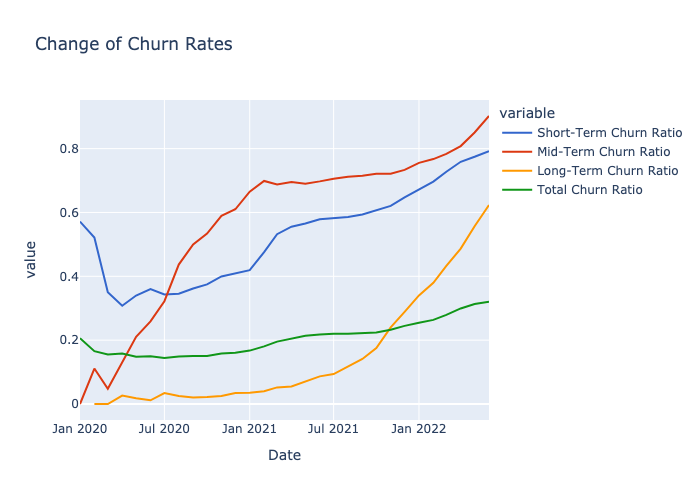

In [32]:
fig = px.line(all_churnrates, x='Date', y=all_churnrates.columns[1:5], title="Change of Churn Rates",  color_discrete_sequence=px.colors.qualitative.G10)
fig.show("png")

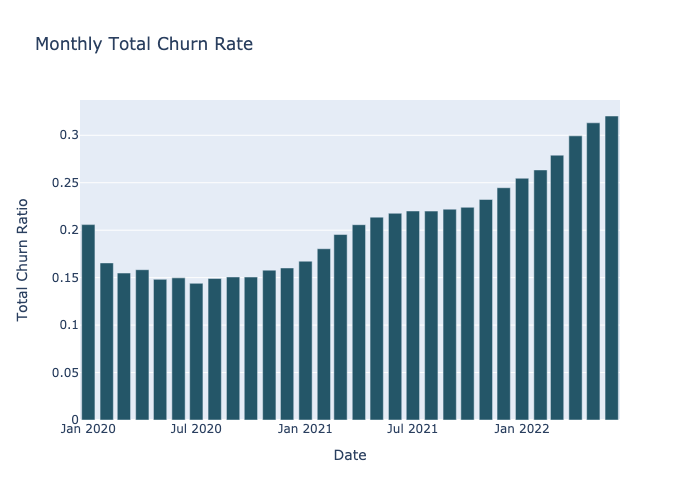

In [33]:
fig = px.bar(all_churnrates, x="Date", y="Total Churn Ratio", title="Monthly Total Churn Rate", color_discrete_sequence=px.colors.carto.Aggrnyl)
fig.show("png")

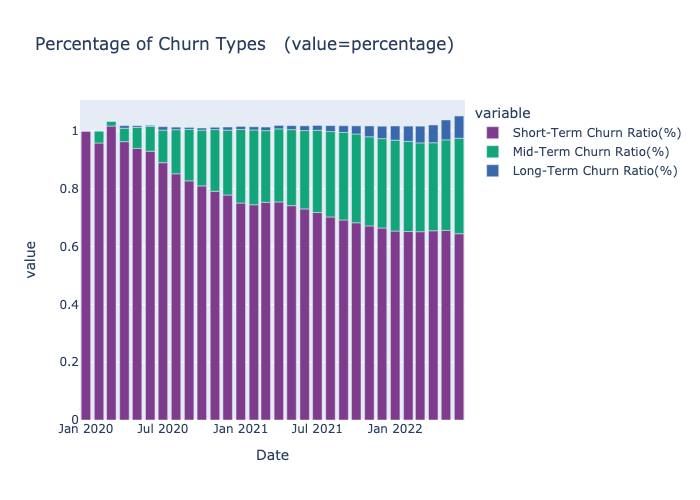

Short-Term Customer: 3 or less than 3 months paid customer
Mid-Term Customer: Between 3-14 months paid customer
Long-Term Customer: 14 or more than 14 months paid customer


In [35]:
fig = px.bar(all_churnpercentages , x="Date", y=['Short-Term Churn Ratio(%)', 'Mid-Term Churn Ratio(%)', 'Long-Term Churn Ratio(%)'],title="Percentage of Churn Types \n (value=percentage)",color_discrete_sequence=px.colors.qualitative.Bold)
fig.show("png")
print("Short-Term Customer: 3 or less than 3 months paid customer")
print("Mid-Term Customer: Between 3-14 months paid customer")
print("Long-Term Customer: 14 or more than 14 months paid customer")

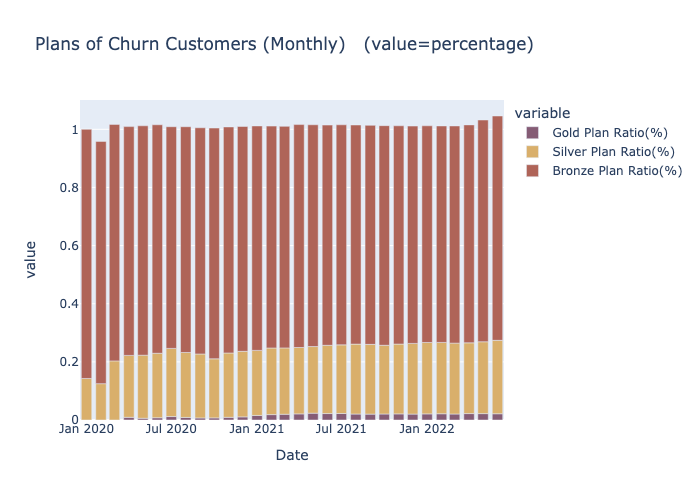

(Storage, Guest and Professional plans are excluded)


In [36]:
fig = px.bar(all_plans , x="Date", y=['Gold Plan Ratio(%)', 'Silver Plan Ratio(%)', 'Bronze Plan Ratio(%)'],title="Plans of Churn Customers (Monthly) \n (value=percentage)",color_discrete_sequence=px.colors.qualitative.Antique)
fig.show("png")
print("(Storage, Guest and Professional plans are excluded)")

In [37]:
g = main_data.loc[(main_data.churn_type == "LONG-TERM")]
t = g.industry.value_counts().head(15)
u = ('construction','arts & design','non-profit organizations','education','health care and social assistance','e-commerce & retail trade','event organization','advertising, marketing & research','food & beverages','sports & activities','finance','transportation','information technology','beauty & personal care','public administration')                

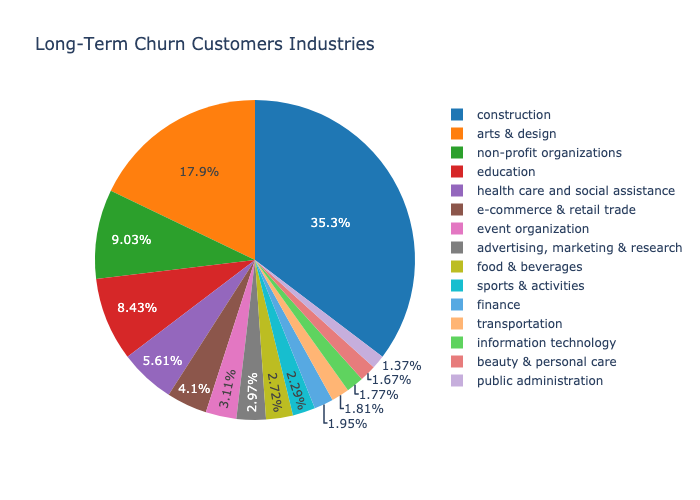

(Only users with industry knowledge in the system are included in this chart.)


In [38]:
fig = px.pie(main_data, values = t,names = u,title = "Long-Term Churn Customers Industries",  color_discrete_sequence=px.colors.qualitative.D3)
fig.show("png")
print("(Only users with industry knowledge in the system are included in this chart.)")

In [39]:
k = main_data.loc[(main_data.churn_type == "MID-TERM")]
y = k.industry.value_counts().head(15)
i = ('construction','non-profit organizations','arts & design','education','health care and social assistance','e-commerce & retail trade','sports & activities','event organization','food & beverages','finance','advertising, marketing & research','information technology','public administration','beauty & personal care','transportation')

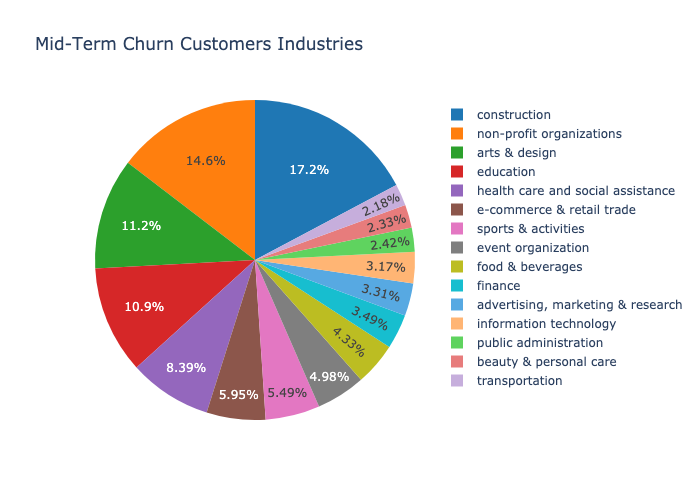

(Only users with industry knowledge in the system are included in this chart.)


In [40]:
fig = px.pie(main_data, values = y, names = i, title = "Mid-Term Churn Customers Industries",  color_discrete_sequence=px.colors.qualitative.D3)
fig.show("png")
print("(Only users with industry knowledge in the system are included in this chart.)")

In [41]:
h = main_data.loc[(main_data.churn_type == "SHORT-TERM")]
p = h.industry.value_counts().head(15)
r = ('non-profit organizations','education','health care and social assistance','e-commerce & retail trade','sports & activities','event organization','arts & design','food & beverages','finance','information technology','advertising, marketing & research','public administration','real estate & leasing','beauty & personal care','transportation')

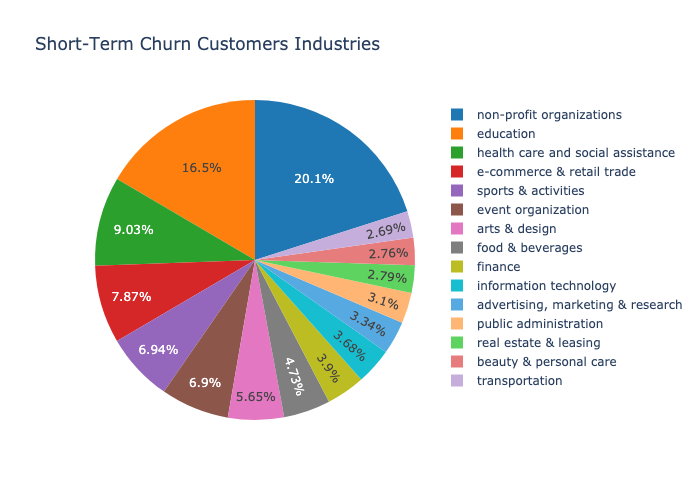

(Only users with industry knowledge in the system are included in this chart.)


In [42]:
fig = px.pie(main_data, values = p,names = r,title = "Short-Term Churn Customers Industries",  color_discrete_sequence=px.colors.qualitative.D3)
fig.show("png")
print("(Only users with industry knowledge in the system are included in this chart.)")

# Now that Churn analysis is finished, we can move on to Life Time Span and CLTV analysis.

In marketing, customer lifetime value (CLV or often CLTV), lifetime customer value (LCV), or life-time value (LTV) is a prognostication of the net profit contributed to the whole future relationship with a customer.

# We define CLTV function and calculate monthly CLTV

In [43]:
dict_cltv = {}
for i, ym in enumerate(YearMonths[1:]):
    t1 = df.loc[(df.churn_date > ym)]
    u1 = t1.user_id.value_counts().sum()
    c1 = t1.total_amount_paid.sum()
    cltv = c1/u1
    dict_cltv[YearMonths[i]]= cltv

In [44]:
cltv_list_date = list(dict_cltv.keys())
cltv_list_values = list(dict_cltv.values())

In [45]:
CLTV = pd.DataFrame(list(zip(cltv_list_date, cltv_list_values)),
                           columns =['Date', 'CLTV'])

In [46]:
CLTV

,Date,CLTV
0,2020-01,169.222345
1,2020-02,169.511607
2,2020-03,169.894711
3,2020-04,170.170980
4,2020-05,171.077384
5,2020-06,171.846360
6,2020-07,172.677354
7,2020-08,173.371242
8,2020-09,174.271931
9,2020-10,175.012974


# We define Customers Life Time Span function and calculate monthly Life Time Span

In [47]:
df1 = pd.read_csv('/Users/emreserhatakkas/Downloads/bq-results-20220718-133529-1658151349029.csv')

In [48]:
df1.head()

,user_id,action,period,date_time
0,4496347601,NaN,NaN,NaN
1,4496347621,NaN,NaN,NaN
2,4496347631,NaN,NaN,NaN
3,4496347641,NaN,NaN,NaN
4,4496347651,NaN,NaN,NaN


In [49]:
df1 = df1.loc[(df1.date_time >= '2018-01')]

In [50]:
def period_calculater(row):
    if row['action'] == 'payment':
        multiplier = 1
    elif row['action'] == 'refund':
        multiplier = -1

    if row['period'] == '1 MONTH':
        return 1*multiplier
    elif row['period'] == '1 YEAR':
        return 12*multiplier
    elif row['period'] == '2 YEARS':
        return 24*multiplier
    else:
        return 0

In [51]:
df1['number_of_months'] = df1.apply(lambda row: period_calculater(row), axis = 1)

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
df1 = df1.sort_values(['user_id','date_time']).reset_index().drop(columns=['index'], axis = 1)
df1.head()

,user_id,action,period,date_time,number_of_months
0,4496352601,payment,1 YEAR,2020-01-07 20:15:13 UTC,12
1,4496352601,payment,1 YEAR,2021-01-14 21:17:22 UTC,12
2,4496352601,refund,1 YEAR,2021-01-15 04:11:04 UTC,-12
3,4496353001,payment,1 YEAR,2021-03-02 16:08:47 UTC,12
4,4496353001,payment,1 YEAR,2022-03-02 05:11:45 UTC,12


In [54]:
temp = df1.iloc[0]

for i, row in df1.iterrows():
    if row['period'] != '1 MONTH' and row['action'] == 'refund':
        if row['user_id'] == temp['user_id']:
            if pd.period_range(row['date_time'],freq='M',periods=1).strftime('%Y-%m').tolist()[0] != pd.period_range(temp['date_time'],freq='M',periods=1).strftime('%Y-%m').tolist()[0]:
                monthEnds = pd.period_range(row['date_time'],freq='M',periods=1) - pd.period_range(temp['date_time'],freq='M',periods=1)
                if row['period'] == '1 YEAR':
                    if str(monthEnds[0])[1] == 'M':
                        df1.at[i,'number_of_months'] = -11
                    else:
                        df1.at[i,'number_of_months'] = -1 * (12 - int(str(monthEnds[0]).split('<')[1].split(' * ')[0]))
                elif row['period'] == '2 YEARS':
                    if str(monthEnds[0])[1] == 'M':
                        df1.at[i,'number_of_months'] = -23
                    else:
                        df1.at[i,'number_of_months'] = -1 * (24 - int(str(monthEnds[0]).split('<')[1].split(' * ')[0]))
    temp = row

In [55]:
df1.loc[(df1.user_id == 4496487181)].sort_values('date_time', ascending=True)

,user_id,action,period,date_time,number_of_months
452,4496487181,payment,1 YEAR,2020-11-27 02:58:57 UTC,12
453,4496487181,payment,1 YEAR,2021-11-27 04:00:29 UTC,12
454,4496487181,refund,1 YEAR,2021-12-02 02:28:56 UTC,-11


In [56]:
dict_LifeTimeSpans = {}
for i, ym in enumerate(YearMonths[1:]):
    df1_temp = df1.loc[df1.date_time<ym]
    ever_paid_users = df1_temp.loc[(df1_temp.action == 'payment')].user_id.unique()
    df1_temp = df1_temp.loc[df1_temp.user_id.isin(ever_paid_users)]
    df1_temp.sort_values('user_id', ascending=True, inplace=True)
    df1_LifeTimeSpan = df1_temp.groupby('user_id').sum()['number_of_months']
    dict_LifeTimeSpans[YearMonths[i]] = df1_LifeTimeSpan.mean()

In [57]:
new_list_dates = list(dict_LifeTimeSpans.keys())
new_list_LifeTimeSpans = list(dict_LifeTimeSpans.values())

In [58]:
LifeTimeSpans = pd.DataFrame(list(zip(new_list_dates, new_list_LifeTimeSpans)),
                           columns =['Date', 'Life Time Span'])

In [59]:
LifeTimeSpans

,Date,Life Time Span
0,2020-01,6.030755
1,2020-02,6.096018
2,2020-03,6.095617
3,2020-04,5.924004
4,2020-05,6.071758
5,2020-06,6.129106
6,2020-07,6.240744
7,2020-08,6.649751
8,2020-09,6.683615
9,2020-10,6.701626


# Now we have a dataset with Life Time Spans and CLTVs. We begin to visualize this datasets

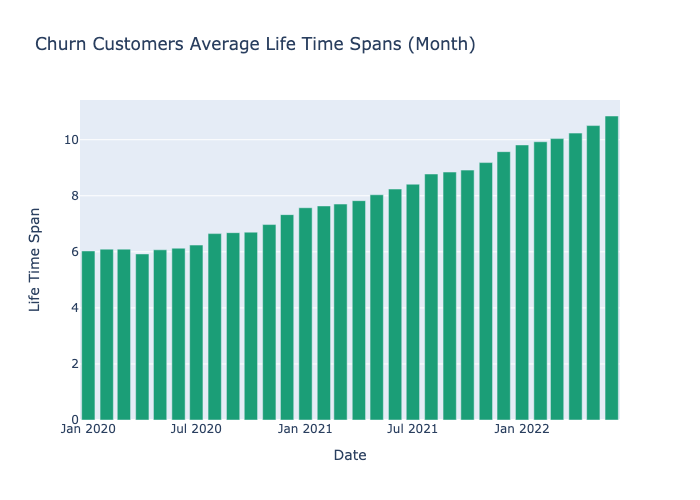

In [60]:
fig = px.bar(LifeTimeSpans, x="Date", y="Life Time Span", title="Churn Customers Average Life Time Spans (Month)",color_discrete_sequence=px.colors.qualitative.Dark2)
fig.show("png")

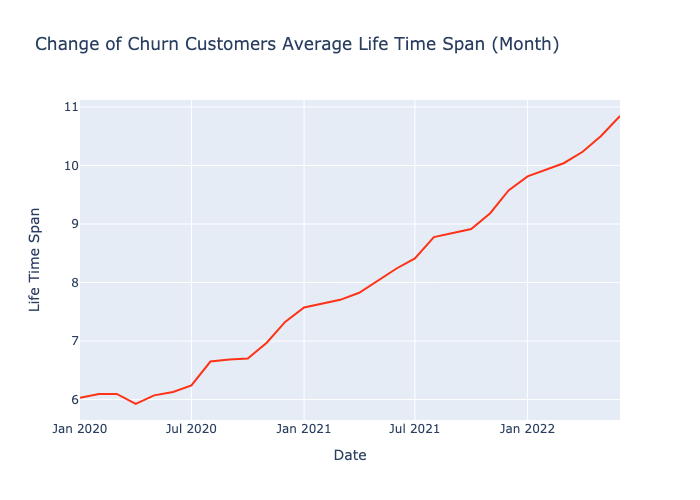

In [61]:
fig = px.line(LifeTimeSpans, x='Date', y="Life Time Span", title="Change of Churn Customers Average Life Time Span (Month)",  color_discrete_sequence=px.colors.qualitative.Light24)
fig.show("png")

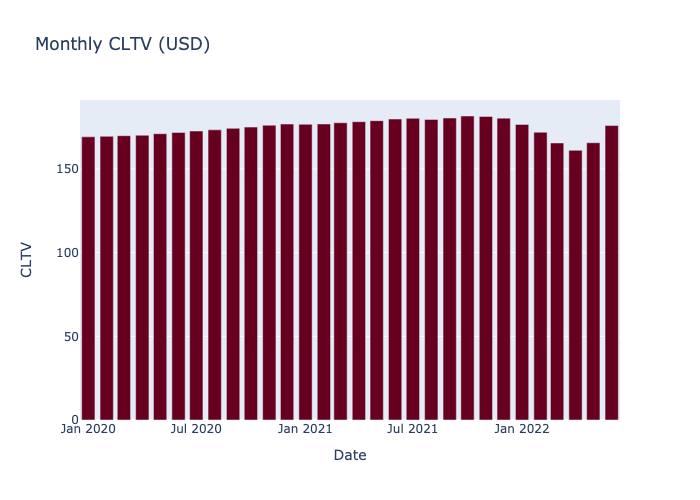

In [62]:
fig = px.bar(CLTV, x="Date", y="CLTV", title="Monthly CLTV (USD)",color_discrete_sequence=px.colors.colorbrewer.RdGy)
fig.show("png")

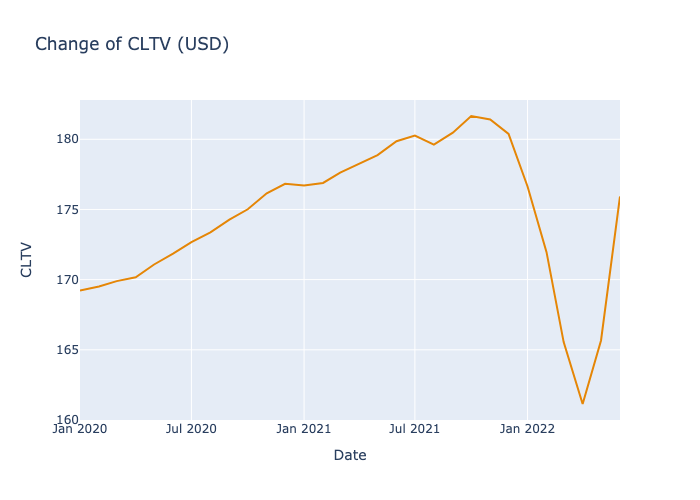

In [63]:
fig = px.line(CLTV, x='Date', y="CLTV", title="Change of CLTV (USD)",  color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show("png")